In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [3]:
data = pd.read_csv("KNN_Project_Data")

In [4]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(data.drop("TARGET CLASS", axis=1))

StandardScaler()

In [9]:
scaled = scaler.transform(data.drop("TARGET CLASS", axis=1))

In [10]:
scaled_df = pd.DataFrame(data=scaled, columns=data.columns[:-1])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, data["TARGET CLASS"], test_size=0.25)

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
predicted = knn_model.predict(X_test)

In [25]:
print("Confusion Matrix \n", confusion_matrix(y_test, predicted))

Confusion Matrix 
 [[ 90  30]
 [ 29 101]]


In [26]:
print("Classification Report \n", classification_report(y_test, predicted))

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       120
           1       0.77      0.78      0.77       130

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



In [27]:
err_rate = []

for i in range(1,40):
    knn_mod = KNeighborsClassifier(n_neighbors=i)
    knn_mod.fit(X_train, y_train)
    predicted = knn_mod.predict(X_test)
    err_rate.append(np.mean(predicted != y_test))

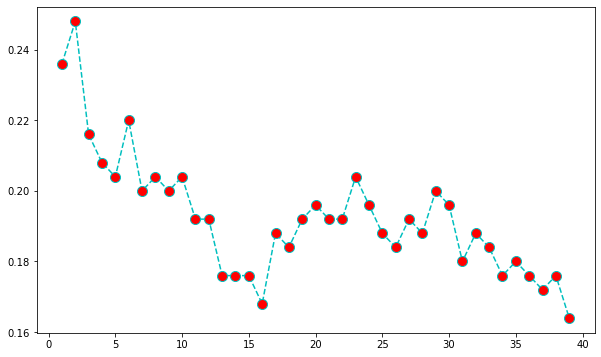

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), err_rate, linestyle="--", color="c", marker="o", markersize=10, markerfacecolor="r")

In [51]:
knn_mod = KNeighborsClassifier(n_neighbors=40)
knn_mod.fit(X_train, y_train)
predicted = knn_mod.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, predicted))
print("\n Classification Report: \n", classification_report(y_test, predicted))

Confusion Matrix: 
 [[ 95  25]
 [ 18 112]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       120
           1       0.82      0.86      0.84       130

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

